In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

In [16]:
orig = np.array(mh.imread('img/me.jpg'), dtype=np.float64) / 255
w, h, d = orig.shape
flat = np.reshape(orig, (w * h, d))

In [17]:
orig.shape

(1280, 960, 3)

In [18]:
samp = shuffle(flat, random_state=0)[:1000]
estim = KMeans(n_clusters=128, random_state=0)
estim.fit(samp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=128, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [19]:
ass = estim.predict(flat)

In [20]:
palt = estim.cluster_centers_
new = np.zeros((w, h, d))
idx = 0
for i in range(w):
    for j in range(h):
        new[i][j] = palt[ass[idx]]
        idx += 1

(-0.5, 959.5, 1279.5, -0.5)

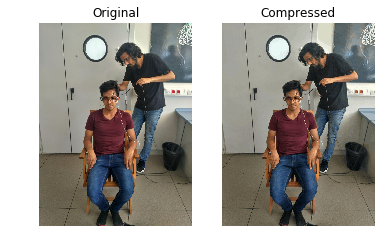

In [21]:
plt.subplot(121)
plt.title('Original')
plt.imshow(orig)
plt.axis('off')
plt.subplot(122)
plt.title('Compressed')
plt.imshow(new)
plt.axis('off')